# Market State Detection (Extended)
The purpose of **bull_bear_periods()** method of **Extractor** class is to detect periods of bullish, bearish and stable states of particular coin market. This method may be considered as a bit experimental since no clear definitions for such terms as *bullish, bearish and stable* are exist. On the other hand, by looking at BTC chart it's clearly possible to find periods of growth and drop of it's price.   

The main goal of this sub-research was to automate the process of finding these periods. Method isn't finished yet nevertheless the core functional is already implemented. Two illustrations below clearly demonstrate the key idea of developed approach. Lower illustration is for real BTC price, upper graph is the current result of running function*.
- periods of grow corresponds to bullish state of market
- periods of drop — to bearish
- periods when line is near zero — to stable state

\*There will be additional post-processing that will classify periods and returns ready-to-use array with one of our three "classes" for each date. So next iteration will bring more intuitive visualizations with (for example) BTC graph that drawn in different colors corresponding to detected state.

In [1]:
# Import of necessary libs and our classes
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cj_loader import Storer, Extractor
storer = Storer()
btc = Extractor(storer.mf['bitcoin'])

In [30]:
# Define the function for colorful graphs
def plot_with_periods(start, finish, periods, extractor):
    datas = extractor.data['close'].loc[extractor.data.index[start]:extractor.data.index[finish]].values
    times = extractor.data['close'].loc[extractor.data.index[start]:extractor.data.index[finish]].index
    colors = ['red' if i==-1 else 'green' if i==1 else 'blue' if i==0 else 'black' for i in periods[start:finish]]
    markers = ['o' if i==-1 else 'o' if i==1 else 'o' if i==0 else '.' for i in periods[start:finish]]

    ax=plt.gca()
    for x, y, c, m in zip(times, datas, colors, markers):
        if m == '.':
            ax.scatter(x, y, alpha=0.8, c=c,marker=m, s=2)
        else:  
            ax.scatter(x, y, alpha=0.8, c=c,marker=m)  


## Selecting parameters
There are many reasons to consider cryptocurrencies markets much more "fast" and less inert than classic markets. Two the most significant reasons are: Crypto-markets are: **younger** and **an order of magnitude more volatile**. This specifics suggests to choose lower values for both input parameters (length of time window and threshold) to obtain more realistic results.


In [2]:
time_window = 10
threshold = 0.1

# parameters can be adjusted
periods = btc.bull_bear_periods(base_t_len_days=time_window, thresh=threshold) 

Here is the example of periods for particular (random) period. Upper figure represents the state: 
- 1 for "bullish"
- 0 for "stable"
- -1 for "bearish"

Lower figure presents a corresponding period of price.

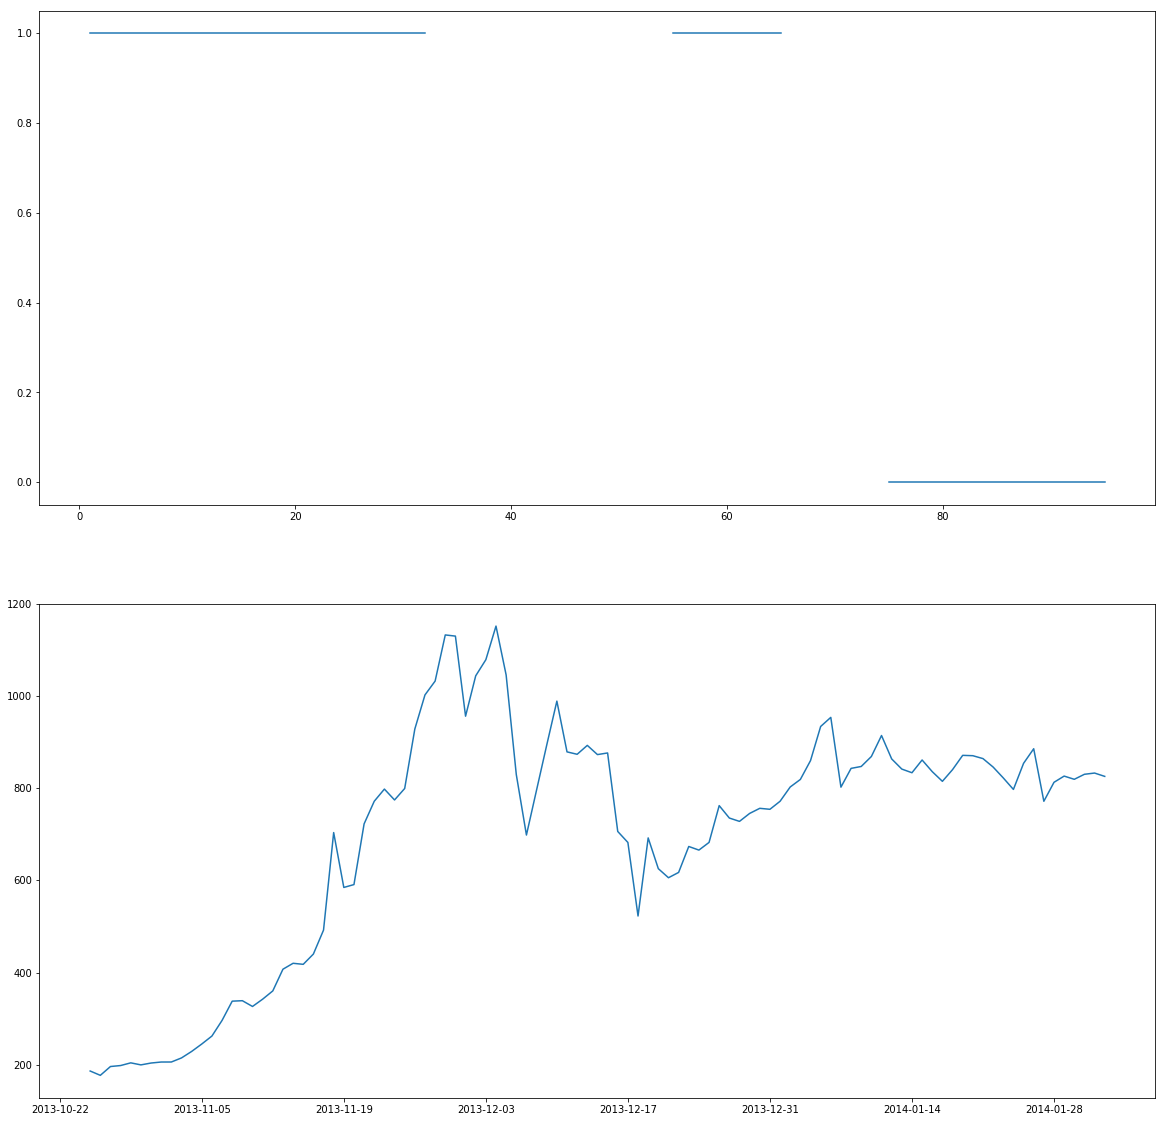

In [14]:
plt.figure(1)
plt.subplot(211)

plt.plot(periods[1750:1850])

plt.subplot(212)
plt.plot(btc.data['close'].loc[btc.data.index[1750]:btc.data.index[1850]])
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

## Visualization
Here is the same timeframe but colored. The fastest way to colorize was used. This lead to drawing points instead of spline.

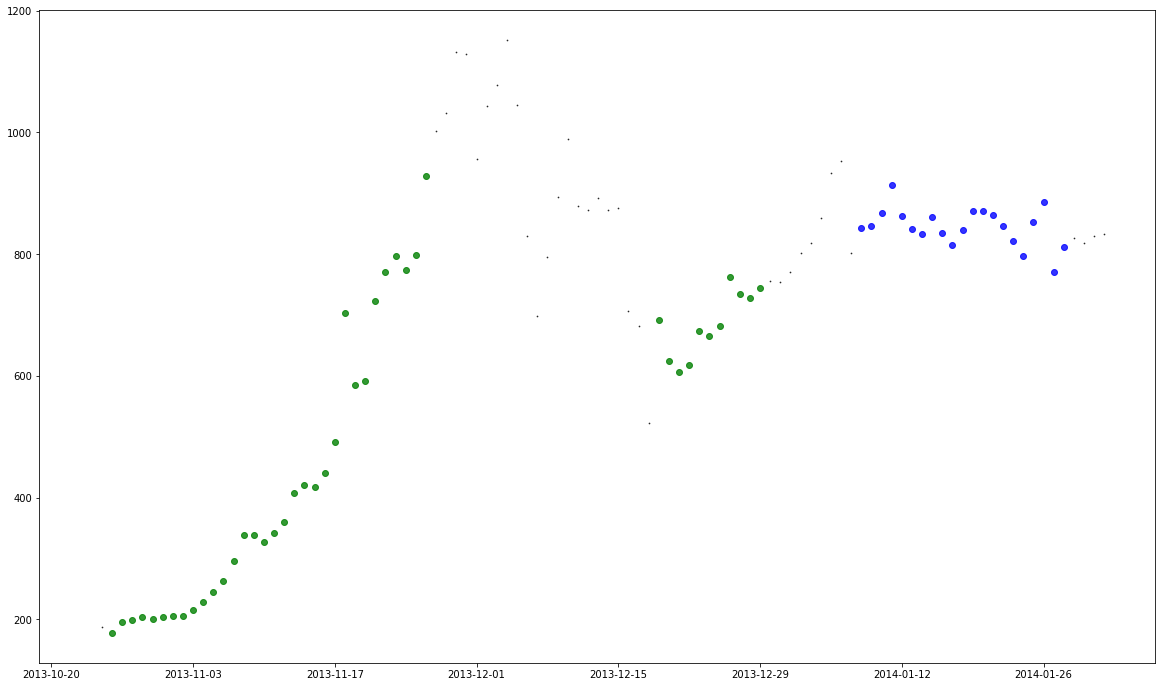

In [31]:
start = 1750
finish = 1850
plot_with_periods(start, finish, periods, btc)

Now let's build the graph* for the whole timeframe:

\* *Note: this scale don't allow to see all specifics of classifying states. It's strongly recommended to study states on timeframes ~ 100 days*

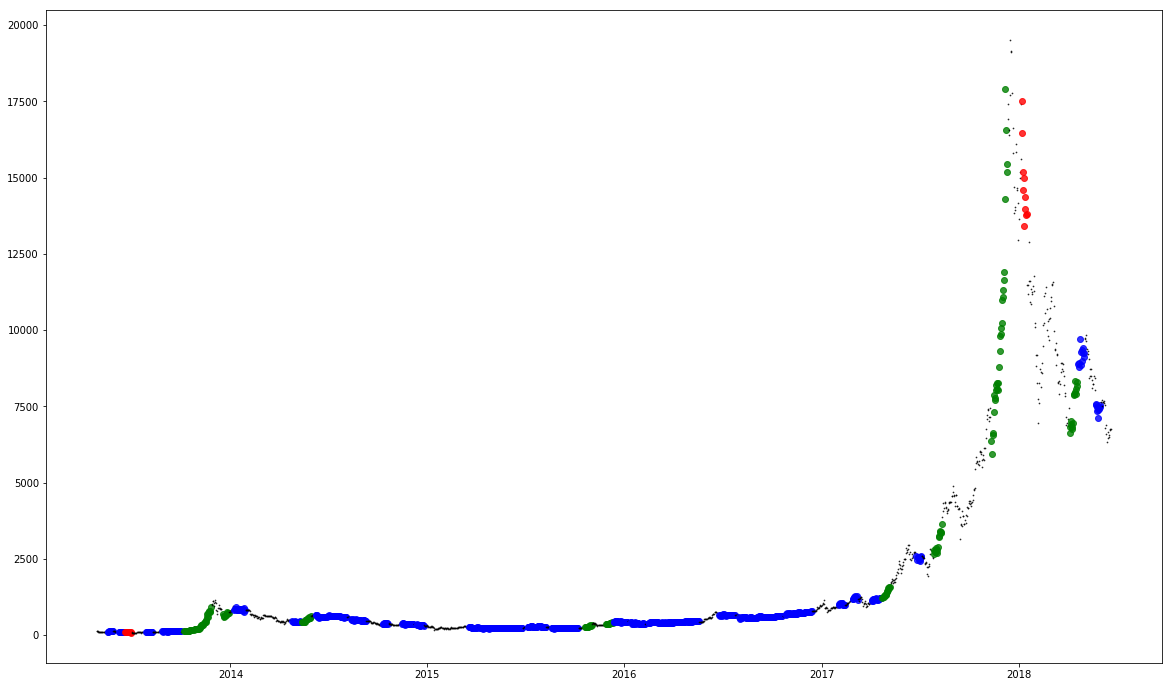

In [32]:
start = 0
finish = 3450
math.log(plot_with_periods(start, finish, periods, btc))

# Conclusions & Next Steps
Additional part of research is now fully completed. Function for detecting market state is working as it supposed. Parameters may be adjusted. Choosing lower parameters allow to "catch" faster market changes, but leads to more fragmentary splitting. Higher values corresponds to more inert and conservative perception of the market state. 

There are several possibilities of improving the function of states detection. One of the major ways is to add some measure of "market sluggishness" or "sensivity" to allow prolongation of detected periods over small jumps of price. And this may be one of the ways of whole research scaling and improvement in case of success of using these results in clustering.

Next step is features extraction. One of additional options may be not only using clustering on different states of BTC, but clustering by states distribution over different coins (grouping coins with similar behaviour in terms of states found).